Exercise:
1. Perform logistic regression on titanix dataset
SUe age column to predict survived

2. Modify the above.  Also include pclass, gender columns in the predictors, You need to encode gender column

Execellent dataset to practice logistics regression code (and eda) : https://kaggle.com/datasets/ranisarkar01/loantap-logisticregression/data

In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [159]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [161]:
# le = LabelEncoder()
# df['Sex'] = le.fit_transform(df['Sex'])  # Encodes Gender as 0 -Female and 1 - Male
# df

In [163]:
df = df.dropna(subset='Age')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [173]:
X = df[['Age']]  #Tried with Age column then pclass and gender
# X = df[['Age', 'Pclass', 'Sex']]
y= df['Survived']


In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
model = LogisticRegression(solver =  'liblinear')
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [179]:
y_test_prediction = model.predict(X_test)
y_train_prediction = model.predict(X_train)

In [181]:
#Display predictions comparision
comparision = pd.DataFrame({'Actual': Y_test , 'predicted' : y_test_prediction})
print(comparision.head(10))

     Actual  predicted
27        0          0
398       0          0
89        0          0
241       1          0
68        0          0
207       0          0
354       1          0
224       1          0
262       1          0
245       0          0


In [183]:
#print accuracy score
print(f"Test Accuracy: {accuracy_score(Y_test,y_test_prediction):.4f}")
print(f"Train Accuracy: {accuracy_score(Y_train,y_train_prediction):.4f}")

Test Accuracy: 0.6100
Train Accuracy: 0.6207


In [185]:
conf_mat = confusion_matrix(Y_test, y_test_prediction)
conf_mat


array([[61,  0],
       [39,  0]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

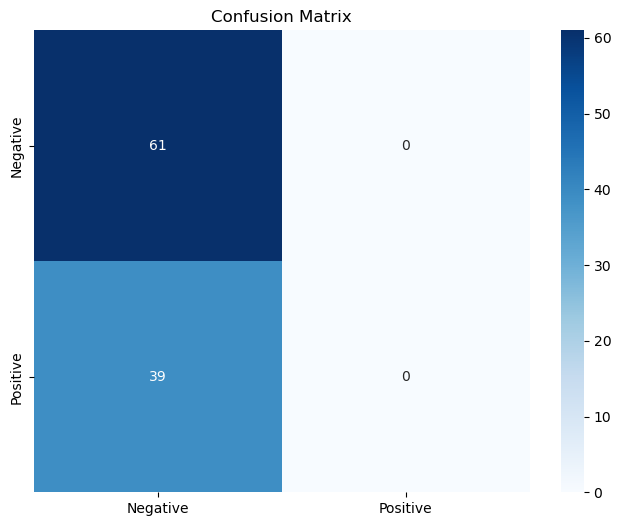

In [187]:
#Visualize Confusion matrix usingheatmap
plt.figure(figsize = (8,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")

In [189]:
#classification report
print('Classification Report')
print(classification_report(Y_test, y_test_prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        61
           1       0.00      0.00      0.00        39

    accuracy                           0.61       100
   macro avg       0.30      0.50      0.38       100
weighted avg       0.37      0.61      0.46       100



C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.